## Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Data Preprocessing

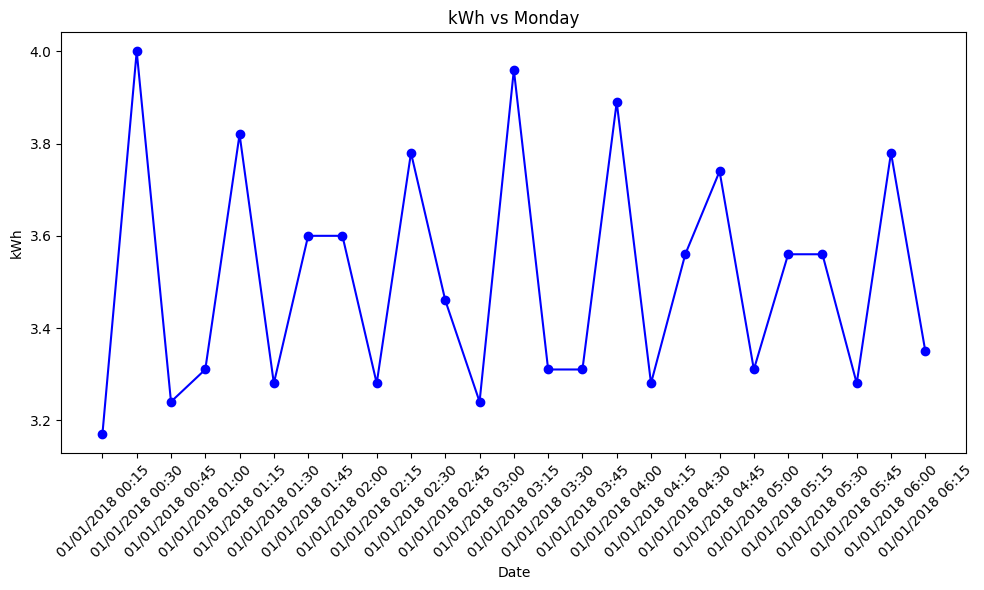

In [39]:
df=data = pd.read_csv("Steel_industry_data.csv")
# df = pd.DataFrame(data)

# Plot kWh vs Day_of_week
df=df[df['Day_of_week'] == 'Monday']
df=df.head(25)
plt.figure(figsize=(10, 6))
# plt.plot(df['Day_of_week'], df['Usage_kWh'], marker='o', linestyle='-', color='b')
plt.plot(df['date'], df['Usage_kWh'], marker='o', linestyle='-', color='b')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('kWh')
plt.title('kWh vs Monday')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

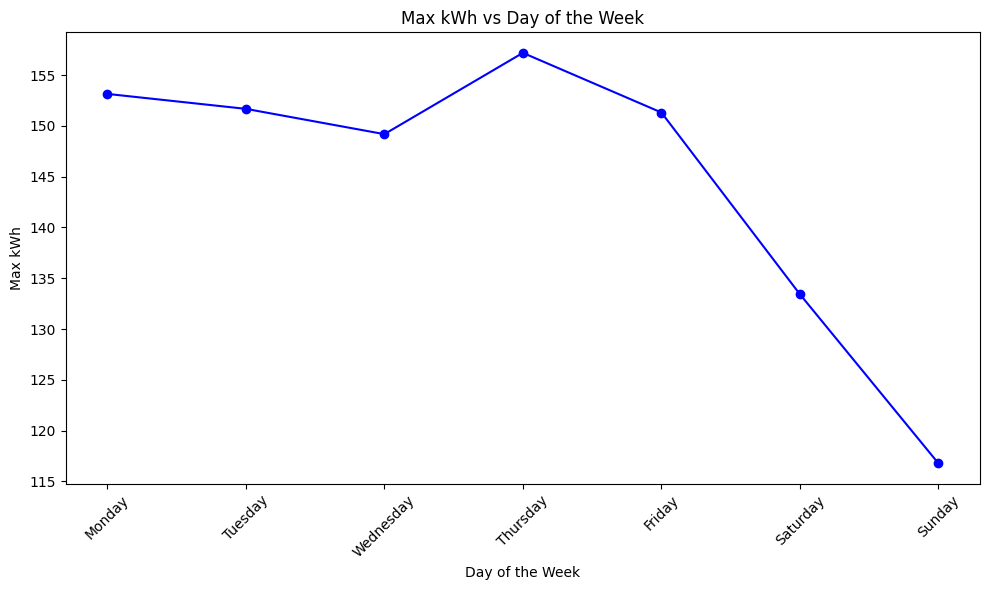

In [40]:
df=data = pd.read_csv("Steel_industry_data.csv")
df_max_kwh = df.groupby('Day_of_week')['Usage_kWh'].max().reset_index()

# Sort by Day_of_week to ensure the days are in the correct order (if needed)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_max_kwh['Day_of_week'] = pd.Categorical(df_max_kwh['Day_of_week'], categories=days_order, ordered=True)
df_max_kwh = df_max_kwh.sort_values('Day_of_week')

# Plot max kWh vs Day_of_week
plt.figure(figsize=(10, 6))
plt.plot(df_max_kwh['Day_of_week'], df_max_kwh['Usage_kWh'], marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Max kWh')
plt.title('Max kWh vs Day of the Week')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [4]:
data = pd.read_csv("Steel_industry_data.csv")
print(data.isnull().sum())  # Count of missing values in each column
datecol=data.iloc[:,0]
print(datecol)

data = data.drop(columns=['date'])
X_train=data.values

data.head()


date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64
0        01/01/2018 00:15
1        01/01/2018 00:30
2        01/01/2018 00:45
3        01/01/2018 01:00
4        01/01/2018 01:15
               ...       
35035    31/12/2018 23:00
35036    31/12/2018 23:15
35037    31/12/2018 23:30
35038    31/12/2018 23:45
35039    31/12/2018 00:00
Name: date, Length: 35040, dtype: object


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
kwh=data.iloc[:,1]
# plt.figure(figsize=(10, 6))
# plt.plot(datecol, kwh, marker='o', color='b', linestyle='-')
# plt.xlabel('Date')
# plt.ylabel('kWh')
# plt.title('Date vs kWh Consumption')
# plt.grid(True)
# plt.xticks(rotation=45)  # Rotate dates for better readability
# plt.tight_layout()       # Adjust layout for better fit
# plt.show()

In [6]:
print(X_train)


[[3.17 2.95 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [4.0 4.46 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.24 3.28 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 ...
 [3.78 3.17 0.07 ... 'Weekday' 'Monday' 'Light_Load']
 [3.78 3.06 0.11 ... 'Weekday' 'Monday' 'Light_Load']
 [3.67 3.02 0.07 ... 'Weekday' 'Monday' 'Light_Load']]


In [7]:
X_train.shape

(35040, 10)

Feature Scaling

In [8]:
#Feature Scaling
scaler = StandardScaler()


X_train[:, :7] = scaler.fit_transform(X_train[:, :7]).astype('float64')


print(X_train)
X_train.shape


[[-0.7241048627057641 -0.6185163432975694 -0.5213850478056785 ...
  'Weekday' 'Monday' 'Light_Load']
 [-0.699287184784774 -0.5259110722465691 -0.5213850478056785 ...
  'Weekday' 'Monday' 'Light_Load']
 [-0.7220118055317047 -0.598278105253311 -0.5213850478056785 ...
  'Weekday' 'Monday' 'Light_Load']
 ...
 [-0.705865364474675 -0.6050241846013972 -0.5119566216410291 ...
  'Weekday' 'Monday' 'Light_Load']
 [-0.705865364474675 -0.6117702639494832 -0.5065689495469436 ...
  'Weekday' 'Monday' 'Light_Load']
 [-0.7091544543196255 -0.6142233837124237 -0.5119566216410291 ...
  'Weekday' 'Monday' 'Light_Load']]


(35040, 10)

In [9]:
X_train

array([[-0.7241048627057641, -0.6185163432975694, -0.5213850478056785,
        ..., 'Weekday', 'Monday', 'Light_Load'],
       [-0.699287184784774, -0.5259110722465691, -0.5213850478056785,
        ..., 'Weekday', 'Monday', 'Light_Load'],
       [-0.7220118055317047, -0.598278105253311, -0.5213850478056785,
        ..., 'Weekday', 'Monday', 'Light_Load'],
       ...,
       [-0.705865364474675, -0.6050241846013972, -0.5119566216410291,
        ..., 'Weekday', 'Monday', 'Light_Load'],
       [-0.705865364474675, -0.6117702639494832, -0.5065689495469436,
        ..., 'Weekday', 'Monday', 'Light_Load'],
       [-0.7091544543196255, -0.6142233837124237, -0.5119566216410291,
        ..., 'Weekday', 'Monday', 'Light_Load']], dtype=object)

Column tranforming and label encoding

In [10]:
# Transforming Categorical data into number matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[7,8])],remainder='passthrough')
X_train=ct.fit_transform(X_train)
print(X_train)
print(X_train.shape)



[[1.0 0.0 0.0 ... 0.5132676163619359 -1.6780152604563736 'Light_Load']
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6419289107691397 'Light_Load']
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6058425610819058 'Light_Load']
 ...
 [1.0 0.0 0.0 ... 0.5126109334762843 1.6780152604563736 'Light_Load']
 [1.0 0.0 0.0 ... 0.5119542505906323 1.7141016101436073 'Light_Load']
 [1.0 0.0 0.0 ... 0.5126109334762843 -1.7141016101436073 'Light_Load']]
(35040, 17)


In [11]:
#label encoding on the suitable column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_train[:,-1]=le.fit_transform(X_train[:,-1])
print(X_train)
type(X_train)
df=pd.DataFrame(X_train)
df.to_csv('scaled_Steel_industry_data.csv', index=False, header=True)

[[1.0 0.0 0.0 ... 0.5132676163619359 -1.6780152604563736 0]
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6419289107691397 0]
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6058425610819058 0]
 ...
 [1.0 0.0 0.0 ... 0.5126109334762843 1.6780152604563736 0]
 [1.0 0.0 0.0 ... 0.5119542505906323 1.7141016101436073 0]
 [1.0 0.0 0.0 ... 0.5126109334762843 -1.7141016101436073 0]]


## Federated Learning

In [12]:
#splitting the entire data into 8 nodes to perform FL
node_data = np.array_split(X_train, 8)


In [13]:
global_model = LinearRegression() #Global Model

Funtions for calculating and aggregating the local models 

In [14]:

def federated_averaging(models):
    """Aggregate model weights using the average."""
    coef_avg = np.mean([model.coef_ for model in models], axis=0)
    intercept_avg = np.mean([model.intercept_ for model in models])
    return coef_avg, intercept_avg

# Function to train the local model on each node's data
def train_local_model(data):
  
    y = data[:, 9]   # Target (Usage_kWh)
  
    X = np.concatenate((data[:, :9], data[:, 10:]), axis=1)
    model = LinearRegression()
    model.fit(X, y)
    return model

Federated Learning Process

In [15]:

for iteration in range(3):
    print(f"Iteration {iteration + 1}:")

    # Local models for each node
    local_models = []

    # Train each node's model using 1460 rows in this iteration
    for i, node in enumerate(node_data):
        start = iteration * 1460
        end = start + 1460
        node_subset = node[start:end]

        # Train the local model on the subset
        local_model = train_local_model(node_subset)
        local_models.append(local_model)

        # Evaluate the local model
        y_pred = local_model.predict(np.concatenate((node_subset[:, :9], node_subset[:, 10:]), axis=1))
        mse = mean_squared_error(node_subset[:, 9], y_pred)
        print(f"  Node {i + 1} - MSE: {mse:.4f}")

    # Aggregate the local model updates using Federated Averaging
    coef_avg, intercept_avg = federated_averaging(local_models)

    # Update the global model with aggregated parameters
    global_model.coef_ = coef_avg
    global_model.intercept_ = intercept_avg

    print(f"Global model updated after iteration {iteration + 1}.\n")


Iteration 1:
  Node 1 - MSE: 0.0491
  Node 2 - MSE: 0.0137
  Node 3 - MSE: 0.0135
  Node 4 - MSE: 0.0126
  Node 5 - MSE: 0.0149
  Node 6 - MSE: 0.0089
  Node 7 - MSE: 0.0120
  Node 8 - MSE: 0.0112
Global model updated after iteration 1.

Iteration 2:
  Node 1 - MSE: 0.0239
  Node 2 - MSE: 0.0137
  Node 3 - MSE: 0.0134
  Node 4 - MSE: 0.0090
  Node 5 - MSE: 0.0116
  Node 6 - MSE: 0.0127
  Node 7 - MSE: 0.0111
  Node 8 - MSE: 0.0081
Global model updated after iteration 2.

Iteration 3:
  Node 1 - MSE: 0.0174
  Node 2 - MSE: 0.0127
  Node 3 - MSE: 0.0117
  Node 4 - MSE: 0.0110
  Node 5 - MSE: 0.0087
  Node 6 - MSE: 0.0056
  Node 7 - MSE: 0.0131
  Node 8 - MSE: 0.0059
Global model updated after iteration 3.



Final Evaluation of our Global model

In [ ]:
# Final Evaluation : Use some test data for evaluation
test_data = node_data[0][:1460]  # Example: Using first 1460 rows from node 1 as test data


y_test = test_data[:, 9]   # Target (Usage_kWh)
    # Select all columns except the 12th column using slicing
X_test= np.concatenate((test_data[:, :9], test_data[:, 10:]), axis=1)

df=pd.DataFrame(y_test)
df.to_csv('test_data.csv', index=False, header=True)

y_pred = global_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
print(f"Final Global Model MSE on Test Data: {final_mse:.4f}")

[[1.0 0.0 0.0 ... 0.5132676163619359 -1.6780152604563736 0]
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6419289107691397 0]
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6058425610819058 0]
 ...
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.0645473157733982 0]
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.0284609660861643 0]
 [1.0 0.0 0.0 ... 0.5132676163619359 -0.9923746163989305 0]]
Final Global Model MSE on Test Data: 0.1609


comparing the predicted results vs the actual results

In [17]:
output=np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)),1)

df=pd.DataFrame(output)
df.to_csv("output.csv", index=False, header=True)

## R2 Score with FL

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2) #With FL

0.9147425756194923


## Visualizing the Results (FL)

In [38]:
# plt.scatter(y_pred,y_test,color='red')

# plt.title("FL using Linear reg")
# plt.xlabel('y_pred')
# plt.ylabel('y_test')
# plt.show()

In [20]:

# # Scatter plot of predictions vs actual values
# plt.scatter(y_pred, y_test, color='red')

# # Plot y=x line
# min_val = min(min(y_pred), min(y_test))
# max_val = max(max(y_pred), max(y_test))
# plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='y = x')

# # Adding title and labels
# plt.title("FL using Linear Regression")
# plt.xlabel('y_pred')
# plt.ylabel('y_test')
# plt.legend()  # Show the legend
# plt.show()


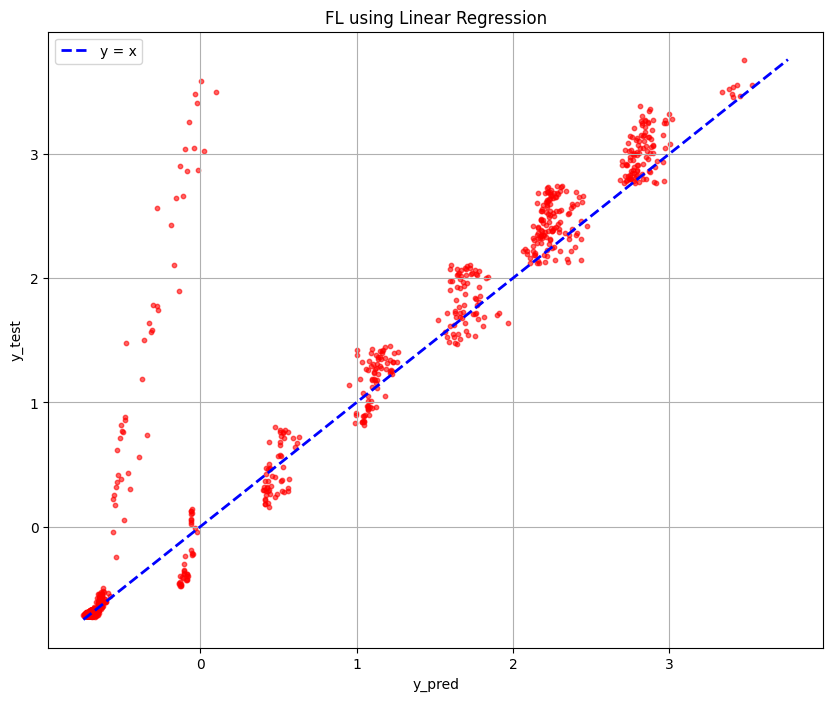

In [21]:
import matplotlib.pyplot as plt

# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(y_pred, y_test, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("FL using Linear Regression")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()


## Comparision of Global model if done Without FL

In [22]:
regressor=LinearRegression()
without_FL=X_train

X_withoutFL= np.concatenate((without_FL[:, :9], without_FL[:, 10:]), axis=1)
y_withoutFL = without_FL[:, 9]   # Target (Usage_kWh)


In [23]:
from sklearn.model_selection import train_test_split

X_withoutFL_train, X_withoutFL_test,y_withoutFL_train,y_withoutFL_test = train_test_split(X_withoutFL,y_withoutFL,test_size=0.25,random_state=0)

In [24]:
X_withoutFL_test.shape

(8760, 16)

In [25]:
X_withoutFL_train.shape

(26280, 16)

In [26]:
y_withoutFL_test.shape

(8760,)

In [27]:
y_withoutFL_train.shape

(26280,)

In [28]:
regressor.fit(X_withoutFL_train,y_withoutFL_train)

LinearRegression()

In [29]:
pred=regressor.predict(X_test)

print(pred)

[-0.69573975 -0.70413208 -0.70281982 ... -0.69018555 -0.69070435
 -0.68930054]


In [30]:
y_test

array([-0.7241048627057641, -0.699287184784774, -0.7220118055317047, ...,
       -0.682243719224576, -0.6801506620505167, -0.682243719224576],
      dtype=object)

## Visualising the results (Without FL)

In [31]:
# plt.scatter(pred,y_test,color='red')

# plt.title("Training the same dataset without FL (regular LR)")
# plt.xlabel('predicted')
# plt.ylabel('actual')
# plt.show()

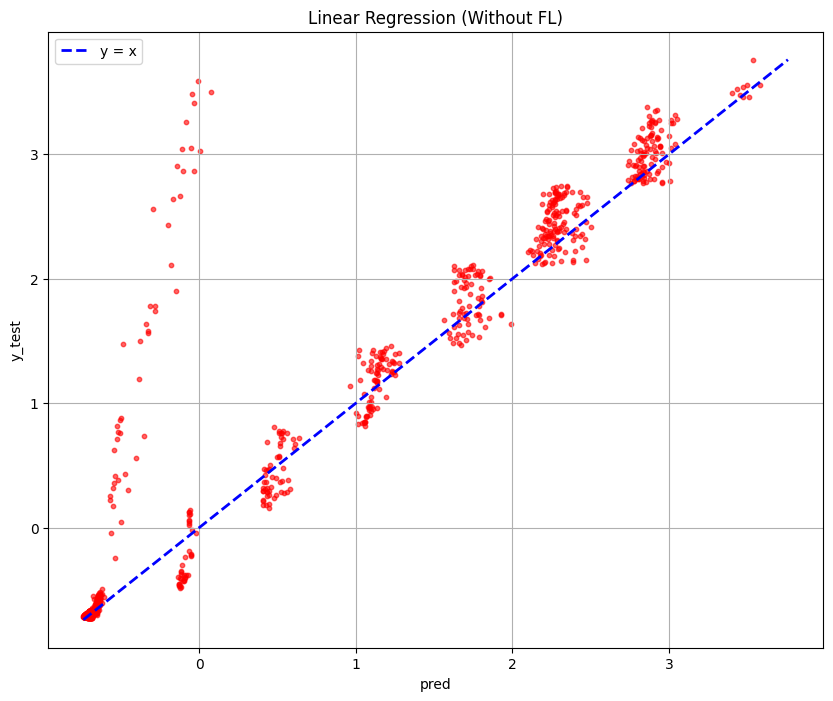

In [41]:
import matplotlib.pyplot as plt

# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(pred, y_test, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(pred), min(y_test))
max_val = max(max(pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("Linear Regression (Without FL)")
plt.xlabel('pred')
plt.ylabel('y_test')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()


In [33]:

# # Scatter plot of predictions vs actual values
# plt.scatter(pred, y_test, color='red')

# # Plot y=x line
# min_val = min(min(pred), min(y_test))
# max_val = max(max(pred), max(y_test))
# plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='y = x')

# # Adding title and labels
# plt.title("Training the same dataset without FL (regular LR)")
# plt.xlabel('predicted')
# plt.ylabel('actual')
# plt.legend()  # Show the legend
# plt.show()


In [34]:
pred.shape

(1460,)

In [35]:
y_test

array([-0.7241048627057641, -0.699287184784774, -0.7220118055317047, ...,
       -0.682243719224576, -0.6801506620505167, -0.682243719224576],
      dtype=object)

In [36]:
pred

array([-0.69573975, -0.70413208, -0.70281982, ..., -0.69018555,
       -0.69070435, -0.68930054])

## R2 score without FL

In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
print(r2) #Without FL

0.9153596849280587
